# Eigenstates of a DQD with 2HH

In this notebook we study the eigenstates for the system of a linear double quantum dot array, populated with two holes. The Hamiltonian that define the system is

$$
H=\left(\begin{array}{ccc}
\left|T_{-}(1,1)\right\rangle & |S(1,1)\rangle & |S(0,2)\rangle \\
-E_{Z} & 0 & -i t_{F} \\
0 & 0 & \sqrt{2} \tau \\
i t_{F} & \sqrt{2} \tau & \varepsilon+u
\end{array}\right)
$$

where $E_Z=g^*\mu_B B$ is the Zeeman splitting, $\tau$ ($t_F$) is the spin-conserving (spin-flip) tunnnelling, $u$ the intradot Coulomb interaction and $\varepsilon\equiv\varepsilon_2-\varepsilon_1$ the detuining between the dot. In fact, to symplify the results we set $\varepsilon_1=-\varepsilon_2$. The tunnelings we will set to be proportional as $\lambda_1=\lambda_2/100$ and $\lambda_2=\tau*0.4$.

Magic lines for reloading my custom functions each time a cell is executed. This allows me to make changed in these functions without need of restarting the kernel to apply them in this notebook. The figure of matplotlib are set to be interative.

In [1]:
%load_ext autoreload
%autoreload 1
%aimport general_functions,plotting_functions, hamiltonians
%matplotlib notebook

Import all the necessary functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hamiltonians import hamiltonian_2QD_1HH_Lowest,hamiltonian_2QD_1HH_All
from plotting_functions import modify_plot, save_figure, cycle_color
from general_functions import compute_limits, compute_eigensystem
from matplotlib import cm

styles = ['science','thesis-color']
prefix = 'stylelib/'
sufix = '.mplstyle'

for i in range(len(styles)):
    styles[i] = prefix + styles[i] + sufix

plt.style.use(styles)

Here we define all the constants of the system

In [3]:
hbar = 6.582 * 10 ** (-1)  # Hbar (ueV*ns)
g = 1.35  # g-factor fo the GaAs
muB = 57.883  # Bohr magneton (ueV/T)
B = 0.015  # Magnetic field applied (T)
ET = g * muB * B  # Zeeman spliting (ueV)
print(ET)
u = 2000  # Intradot interaction (ueV)
tau=0.25
l2=tau*0.4
l1=l2/100

n_B=1000
B_vector=np.linspace(0.015,1, n_B)
ET_vector=g * muB * B_vector

1.1721307500000002


In [4]:
n_eps=10**3 # Number of elements in the eps vector
limit_eps_lower = -4 #Limit value for the value of (e+u)/ET. The initial and final values will be [-limit,limit] respectively
limit_eps_upper=4
eps_vector = np.linspace(limit_eps_lower, limit_eps_upper, n_eps) * ET_vector[0] - u  #Compute the values for the detuning


#Create the vector for the tunnelings
n_tau=10**3
min_tau=0.1
max_tau=5
tau_vector=np.linspace(min_tau,max_tau,n_tau)
l2_vector=tau_vector*0.4
l1_vector=l2_vector/100

#Create the hypermatrix that will constains the hamiltonians. In the first coordinate tau is fixed, while in the second one
#what is fixed is the detuning eps

hypermatrix=np.zeros([n_eps,n_tau,3,3],dtype=complex)

for i in range (0,n_eps):
    for j in range (0,n_tau):
        # parameters=[eps_vector[i], u, ET, tau_vector[j], l1_vector[j],l2_vector[j]] # Save the parameters
        parameters=[eps_vector[i], u, ET, tau_vector[j], l1,l2]
        hypermatrix[i,j]=hamiltonian_2QD_1HH_Lowest(*parameters)  # Create the hamiltonian

eigensystem = np.linalg.eigh(hypermatrix)  # Compute the eigensystem of the hypermatrix

# Compute the population of the different states
population_T_=np.abs(eigensystem[1][:,:,0,:])**2 # Population of the tirplet state |T_-(1,1)>
population_S11=np.abs(eigensystem[1][:,:,1,:])**2 # Population of the singlet state with single occupation |S(1,1)>
population_S02=np.abs(eigensystem[1][:,:,2,:])**2 # Population of the singlet state with double occupation |S(0,2)>

<IPython.core.display.Javascript object>


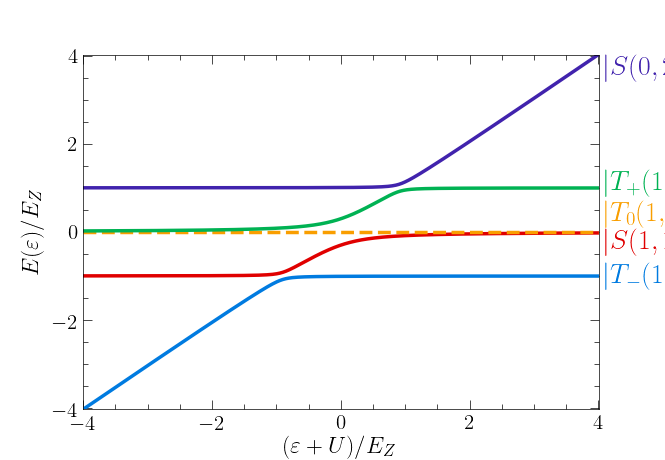

Figure saved


In [6]:
save=True
rescaling=1.9
parameters=[eps_vector, u, ET, tau, l2]
energies,states, fig, ax=compute_eigensystem(parameters, hamiltonian_2QD_1HH_All, plot=True, x_vector=(eps_vector+u)/ET,
                                             normalization= ET, labels= [r'$(\varepsilon+U)/E_Z$',r'$E(\varepsilon)/E_Z$'])

parameters=[eps_vector, u, ET, 0, 0]
energies2,states2=compute_eigensystem(parameters, hamiltonian_2QD_1HH_All)

lines_styles=['-','-','--','-','-']
figsize=[3.5*rescaling, 2.425*rescaling]
colors=[cycle_color(0),cycle_color(1),cycle_color(2), cycle_color(3),cycle_color(4)]

modify_plot(ax, fig=fig, lines_style=lines_styles, x_ticks_vector=np.arange(-4,5,2),y_ticks_vector=np.arange(-4,5,2),
            figsize=figsize, colors_list=colors, tick_label_size=15, label_size=17)


ax.set_ylim([-4,4])

annotation_size=20
ax.text(4.1,-1.25,r'$|T_-(1,1)\rangle$',{'color':colors[0],'fontsize':annotation_size})
ax.text(4.1,-0.4,r'$|S(1,1)\rangle$',{'color':colors[1],'fontsize':annotation_size})
ax.text(4.1,0.15,r'$|T_0(1,1)\rangle$',{'color':colors[2],'fontsize':annotation_size})
ax.text(4.1,0.85,r'$|T_+(1,1)\rangle$',{'color':colors[3],'fontsize':annotation_size})
ax.text(4.1,3.55,r'$|S(0,2)\rangle$',{'color':colors[4],'fontsize':annotation_size})
ax.autoscale(tight=True)

save_figure(fig, 'eigenenergies_DQD_2HH', overwrite=save,dic='thesis')

In the next cell we plot the population of the double occupation state in the three instant eigenstates of the system

<IPython.core.display.Javascript object>


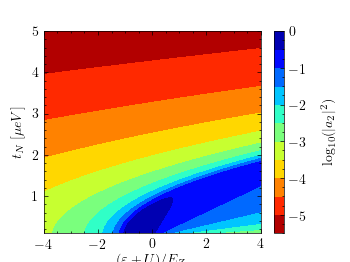

Figure saved


In [16]:
save = False  # Parameter that control is the function must be saved
contour = True  #If we can to plot the contour levels
levels= np.arange(-4,0+0.5,0.5) # Number of levels to plot in the contour
levels=10

#Lists to save the figures and the axes
fig_list=[]
ax_list=[]

for i in range (1,2):  #Iterate over all the eigenstates
    data=np.log10(population_S02[:,:,i]).transpose()# Data to plot
    fig, ax = plt.subplots() # Initialize a new figure
    
    #Save in a list the figure and the axis
    fig_list.append(fig)
    ax_list.append(ax)
    
    if contour:
        pos=ax.contourf((eps_vector+u)/ET,tau_vector,data,levels, cmap='jet_r')
    else:
        pos=ax.imshow(data,aspect='auto',interpolation='spline36',origin='lower',
                      extent=[((eps_vector+u)/ET)[0],((eps_vector+u)/ET)[-1],tau_vector[0],tau_vector[-1]])
        
        contours=ax.contour((eps_vector+u)/ET,tau_vector, data,
                            colors='black')
        
        ax.clabel(contours, inline=True, fontsize=8)
    
    #Set labels
    ax.set_xlabel(r'$(\varepsilon+U)/E_Z$')
    ax.set_ylabel(r'$t_N \; [\mu eV]$')
    
    #Set colorbar with the label
    cbar=fig.colorbar(pos, ax=ax)
    cbar.set_label(r'$\log_{10}(|a_2|^2)$', labelpad=12)

#If the figure must be saved then it is modified and saved if the parameter overwrite is set to True
index=0 #Index of the figure to save
if save:
    # modify_plot(ax_list[index], tick_direction='in',label_size=15, tick_label_size=12)
    
    save_figure(fig_list[index],'occupation_middle_state', overwrite=save, dic='thesis')

In the next figure we plot the population of the triplet state in the second instant eigenstate in terms of the parameters of the system

<IPython.core.display.Javascript object>


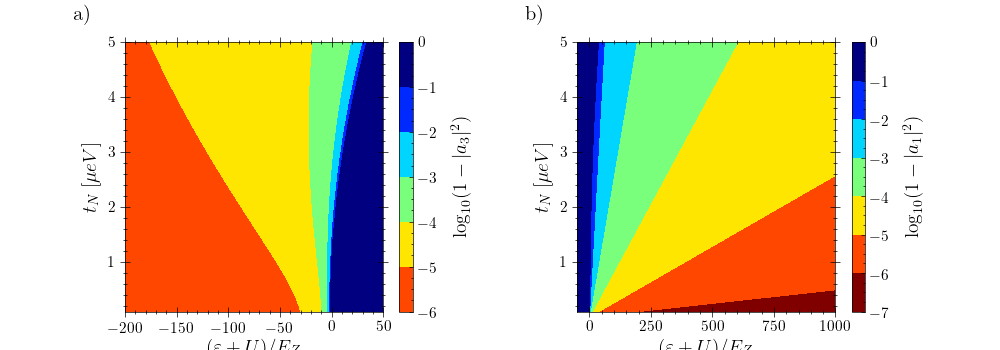

Figure saved


In [13]:
colors = cm.get_cmap('jet_r')
new_map = colors(np.linspace(0, 1, 7))

save = False  # Parameter that control is the function must be saved

contour = True  #If we can to plot the contour levels
index=1

ticks=11
labels=14
contours=9
levels=6

fig, [ax1,ax2] = plt.subplots(ncols=2,figsize=[10,3.5])
fig.subplots_adjust(wspace=0.4)

data=np.log10(1-population_T_[:,:,index].transpose()) # Data to plot


if contour:
    pos=ax1.contourf((eps_vector+u)/ET,tau_vector,data,levels,colors=new_map[1:])
        
else:
    pos=ax1.imshow(data,aspect='auto',origin='lower',
              extent=[(eps_vector[0]+u)/ET,(eps_vector[-1]+u)/ET,tau_vector[0],tau_vector[-1]],
                   interpolation='spline16',cmap='jet_r')
    

# contours1=ax1.contour((eps_vector+u)/ET,tau_vector, data, 6,colors='black',linestyles='solid')
# ax1.clabel(contours1, inline=True, fontsize=contours)    

#Set labels
ax1.set_xlabel(r'$(\varepsilon+U)/E_Z$')
ax1.set_ylabel(r'$t_N \; [\mu eV]$')
    
#Set colorbar with the label
cbar1=fig.colorbar(pos, ax=ax1)
cbar1.set_label(r'$\log_{10}(1-|a_3|^2)$', fontsize=labels, labelpad=12)
cbar1.ax.tick_params(labelsize=ticks) 

ax1.set_xlim([limit_eps_lower,50])

data=np.log10(1-population_S11[:,:,index].transpose()) # Data to plot


if contour:
    pos=ax2.contourf((eps_vector+u)/ET,tau_vector,data,levels, colors=new_map)
else:
    pos=ax2.imshow(data,aspect='auto',origin='lower',
              extent=[(eps_vector[0]+u)/ET,(eps_vector[-1]+u)/ET,tau_vector[0],tau_vector[-1]],
                   interpolation='spline16',cmap='jet_r')
    
# contours2=ax2.contour((eps_vector+u)/ET,tau_vector, data, [-5,-4,-3,-2,-1],colors='black',linestyles='solid')
# ax2.clabel(contours2, inline=True, fontsize=contours)   


#Set labels
ax2.set_xlabel(r'$(\varepsilon+U)/E_Z$')
ax2.set_ylabel(r'$t_N \; [\mu eV]$')

ax2.set_xlim([-50,limit_eps_upper])
    
#Set colorbar with the label
cbar2=fig.colorbar(pos, ax=ax2)
cbar2.set_label(r'$\log_{10}(1-|a_1|^2)$', fontsize=labels, labelpad=12)
cbar2.ax.tick_params(labelsize=ticks) 

if save:
    
    ax1.text(-250,5.4,'a)',{'fontsize':15})
    ax2.text(-260,5.4,'b)',{'fontsize':15})
    
    modify_plot(ax1, tick_direction='inout', label_size=labels, tick_label_size=ticks)
    ax1.set_xlim([limit_eps_lower,50])
    
    modify_plot(ax2, tick_direction='inout', label_size=labels, tick_label_size=ticks)
    ax2.set_xlim([-50,limit_eps_upper])
    
    # plt.tight_layout()
    
    save_figure(fig,'limits_FAQUAD', overwrite=save, dic='thesis')

In [72]:
parameters = [0, u, ET, 0, l1, l2]

limit1 = 0.9999
limit2 = 0.9999
state_1 = 0
state_2 = 1
adiabatic_state = 1

lim_T, lim_S = compute_limits(hamiltonian_2QD_1HH_Lowest, parameters, limit1, limit2, state_1, state_2, adiabatic_state,
                              eps_vector, tau_vector, 0, 3,filter_bool=True, window=51)

<IPython.core.display.Javascript object>


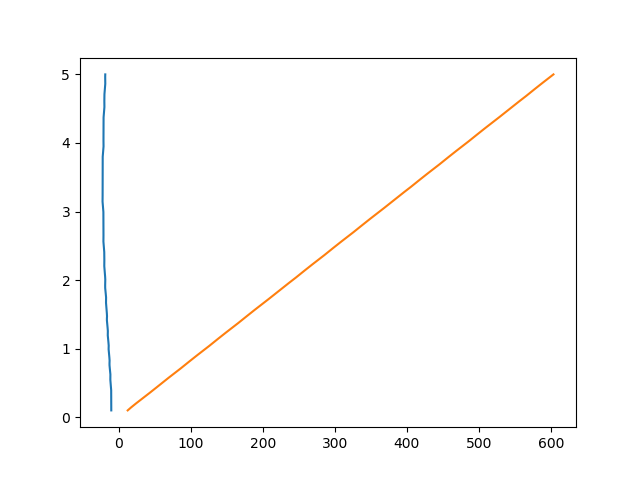

In [76]:
plt.style.use('default')
plt.figure()
plt.plot((lim_T+u)/ET,tau_vector)
plt.plot((lim_S+u)/ET,tau_vector)